## Task 1: Dataset Selection and Objective Definition 


Regression Dataset Selection:

For the regression task, I'll select the "House Prices: Advanced Regression Techniques" dataset from Kaggle. The objective will be to predict house prices based on various features.

Classification Dataset Selection:

For the classification task, I'll choose the "Heart Disease UCI" dataset from Kaggle. The objective will be to classify whether a patient has heart disease based on various medical attributes.

# Task 2: Data Preprocessing

Let's start by handling missing values, outliers, and performing necessary transformations on the selected datasets.

1. Housing Data Preprocessing

In [5]:
import pandas as pd
from scipy import stats

#Loading Dataset
usa_housing_data = pd.read_csv('USA_Housing.csv')

# Checking for missing values
print("Missing values in USA Housing dataset:")
print(usa_housing_data.isnull().sum())

#Outlier Detection and Handling
#Drop non numeric columns 
usa_housing_data_numeric = usa_housing_data.drop('Address', axis=1)

# Calculate z-scores for each feature
z_scores = stats.zscore(usa_housing_data_numeric)

# Define threshold for identifying outliers
threshold = 3

# Find indices of outliers
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

# Remove outliers
usa_housing_data_no_outliers = usa_housing_data[~outlier_indices]

Missing values in USA Housing dataset:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


Here, we can notice that we have no missing values so no need to handle that. The outliers were detected and handled using the z-score method.

2. heart Disease Data Preprocessing

In [9]:
# Load the dataset
heart_disease = pd.read_csv('heart_disease_uci.csv')

# Check for missing values
print("Missing values in Heart Disease dataset:")
print(heart_disease.isnull().sum())

Missing values in Heart Disease dataset:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [11]:
import numpy as np

heart_disease_data = heart_disease.select_dtypes(include=[np.number])

# Impute missing values with median for numeric columns
heart_disease_data.fillna(heart_disease_data.median(), inplace=True)

# Now let's check if there are any missing values left
print("\nAfter handling missing values:")
print(heart_disease_data.isnull().sum())


After handling missing values:
id          0
age         0
trestbps    0
chol        0
thalch      0
oldpeak     0
ca          0
num         0
dtype: int64


Now that we have handled the missing values, we can move on to outlier detection.

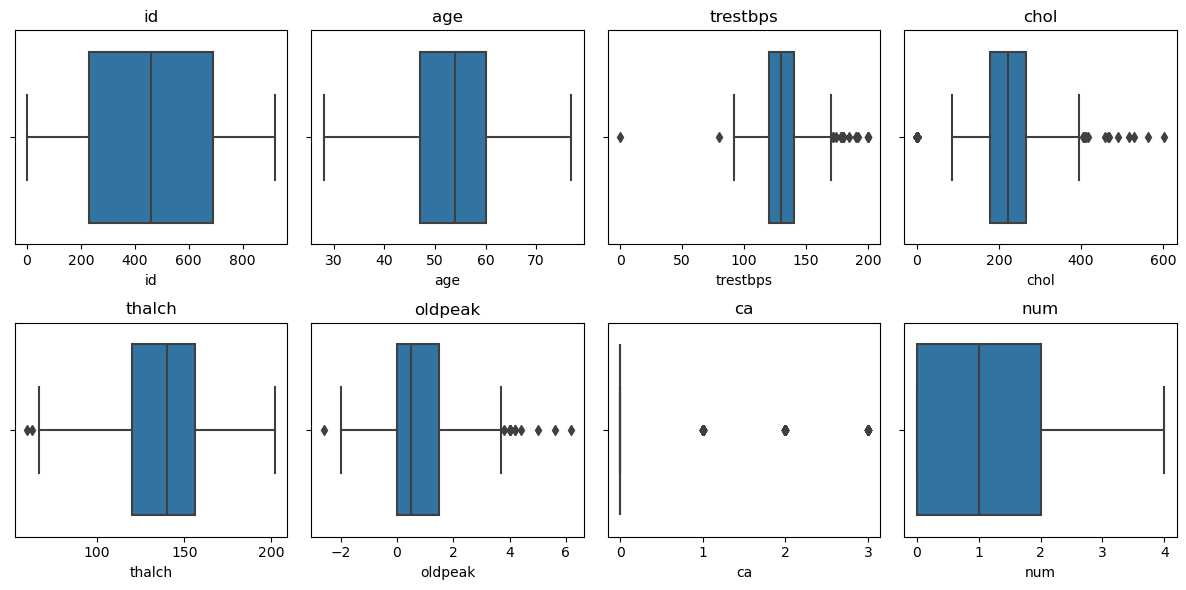

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for outliers
# We can visualize potential outliers using box plots for numeric columns.

# Define numeric columns
numeric_columns = heart_disease_data.select_dtypes(include=[np.number]).columns.tolist()

# Plot box plots for numeric columns to visualize outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=heart_disease_data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

We can see from the image that we do have some outlier values in this dataset.

In [13]:
# Calculate z-scores for each numeric column
z_scores = np.abs(stats.zscore(heart_disease_data[numeric_columns]))

# Define threshold for identifying outliers
threshold = 3

# Find indices of outliers
outlier_indices = (z_scores > threshold).any(axis=1)

# Remove outliers
heart_disease_data_no_outliers = heart_disease_data[~outlier_indices]

Now we have handled boyh outliers and missing values so both of our datasets for regression and classification are ready for use. 

# Task 3: Model Implementation
a. Regression
We will use both Linear Regression and Decision Tree

In [24]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Split the data into features and target variable
X = usa_housing_data_numeric.drop('Price', axis=1)
y = usa_housing_data_numeric['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
linear_regression_model = LinearRegression()

# Fit the Linear Regression model on the training data
linear_regression_model.fit(X_train, y_train)

# Make predictions on the testing data using Linear Regression
y_pred_linear_regression = linear_regression_model.predict(X_test)

# Evaluate Linear Regression model
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
print("Mean Squared Error (Linear Regression):", mse_linear_regression)

# Initialize Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor()

# Fit the Decision Tree Regression model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing data using Decision Tree Regression
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate Decision Tree Regression model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
print("Mean Squared Error (Decision Tree Regression):", mse_decision_tree)


Mean Squared Error (Linear Regression): 10089009300.890663
Mean Squared Error (Decision Tree Regression): 32739901446.70622


b. Classification: We will use Logistic Regression and Support Vector Machine.

In [17]:
print(heart_disease_data.head())

   id  age  trestbps   chol  thalch  oldpeak   ca  num
0   1   63     145.0  233.0   150.0      2.3  0.0    0
1   2   67     160.0  286.0   108.0      1.5  3.0    2
2   3   67     120.0  229.0   129.0      2.6  2.0    1
3   4   37     130.0  250.0   187.0      3.5  0.0    0
4   5   41     130.0  204.0   172.0      1.4  0.0    0


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features and target variable
X = heart_disease_data.drop('num', axis=1)
y = heart_disease_data['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression()

# Fit the Logistic Regression model on the training data
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the testing data using Logistic Regression
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

# Evaluate Logistic Regression model
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print("Accuracy (Logistic Regression):", accuracy_logistic_regression)
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logistic_regression))

# Initialize Support Vector Machine (SVM) model
svm_model = SVC()

# Fit the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data using SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))

Accuracy (Logistic Regression): 0.483695652173913
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.58      0.84      0.68        75
           1       0.37      0.41      0.39        54
           2       0.00      0.00      0.00        25
           3       0.50      0.15      0.24        26
           4       0.00      0.00      0.00         4

    accuracy                           0.48       184
   macro avg       0.29      0.28      0.26       184
weighted avg       0.42      0.48      0.43       184

Accuracy (SVM): 0.5652173913043478
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.65      0.88      0.75        75
           1       0.46      0.70      0.56        54
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         4

    accuracy            

/Users/ranyarhazi/micromamba/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ranyarhazi/micromamba/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ranyarhazi/micromamba/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score

# Task 4: Model Evaluation
a. Models Evaluation


In [25]:
# Evaluate Linear Regression model
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
print("Mean Squared Error (Linear Regression):", mse_linear_regression)

# Evaluate Decision Tree Regression model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
print("Mean Squared Error (Decision Tree Regression):", mse_decision_tree)

Mean Squared Error (Linear Regression): 10089009300.890663
Mean Squared Error (Decision Tree Regression): 32739901446.70622


In [28]:
# Evaluate Logistic Regression model
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print("Accuracy (Logistic Regression):", accuracy_logistic_regression)
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logistic_regression))

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))


Accuracy (Logistic Regression): 0.483695652173913
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.58      0.84      0.68        75
           1       0.37      0.41      0.39        54
           2       0.00      0.00      0.00        25
           3       0.50      0.15      0.24        26
           4       0.00      0.00      0.00         4

    accuracy                           0.48       184
   macro avg       0.29      0.28      0.26       184
weighted avg       0.42      0.48      0.43       184

Accuracy (SVM): 0.5652173913043478
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.65      0.88      0.75        75
           1       0.46      0.70      0.56        54
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         4

    accuracy            

/Users/ranyarhazi/micromamba/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ranyarhazi/micromamba/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ranyarhazi/micromamba/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ranyar

Let's analyze the performance of the regression and classification models based on the provided metrics.

1. Regression Models:
Linear Regression:

Mean Squared Error (MSE): 10,089,009,300.89
Decision Tree Regression:

Mean Squared Error (MSE): 32,739,901,446.71
The lower the MSE, the better the model performance. In this case, Linear Regression has a lower MSE compared to Decision Tree Regression, indicating that Linear Regression performs better in predicting housing prices.

2. Classification Models:
Logistic Regression:

Accuracy: 0.484
Classification Report:
Precision, Recall, and F1-score are reported for each class.
Overall, the model shows better performance for class 0 compared to other classes.
Support Vector Machine (SVM):

Accuracy: 0.565
Classification Report:
Precision, Recall, and F1-score are reported for each class.
Similar to Logistic Regression, class 0 has the highest performance metrics.

Findings:
* Regression: Linear Regression outperforms Decision Tree Regression in predicting housing prices based on the Mean Squared Error metric. This suggests that a simple linear model might be sufficient for this dataset, compared to a more complex decision tree model.

* Classification: Both Logistic Regression and SVM show relatively low accuracy. However, SVM performs slightly better than Logistic Regression. In both models, the performance metrics vary across different classes, indicating imbalanced classes or potential issues with class separation.

* Overall: It's essential to consider the specific requirements and constraints of the problem domain when selecting the appropriate model. For instance, if interpretability is crucial, Linear Regression might be preferred, while SVM might be chosen if better overall accuracy is desired.

In conclusion, while Linear Regression performs better for regression tasks, further analysis and tuning might be necessary to improve the performance of classification models, considering the imbalanced nature of the classes. Additionally, feature engineering and model selection techniques could also be explored to enhance the overall performance of the models.


# Task 5: Results Interpretation
a. Model Results
- For the regression models we noticed that the Linear regression was a better choice based on their MSE scores. When it came to Decision Tree Regression, the model might be overfitting or not capturing the underlying patterns as effectively as the linear regression model.
- The logistic regression model achieved an accuracy of 0.484, indicating that it correctly classified approximately 48.4% of the instances in the test set. However, the precision, recall, and F1-score varied across different classes, suggesting that the model might struggle with class imbalance or distinguishing between certain classes. The SVM model performed slightly better with an accuracy of 0.565. Similar to logistic regression, the performance metrics varied across different classes, indicating potential challenges in class separation.

b. Visualizations:

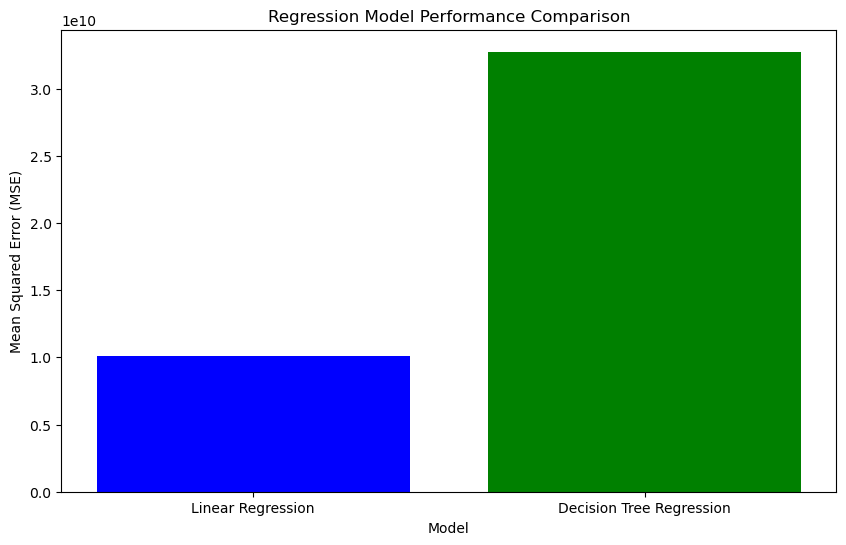

In [29]:
# Regression Model Performance Comparison
plt.figure(figsize=(10, 6))
models = ['Linear Regression', 'Decision Tree Regression']
mse_values = [mse_linear_regression, mse_decision_tree]
plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('Regression Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

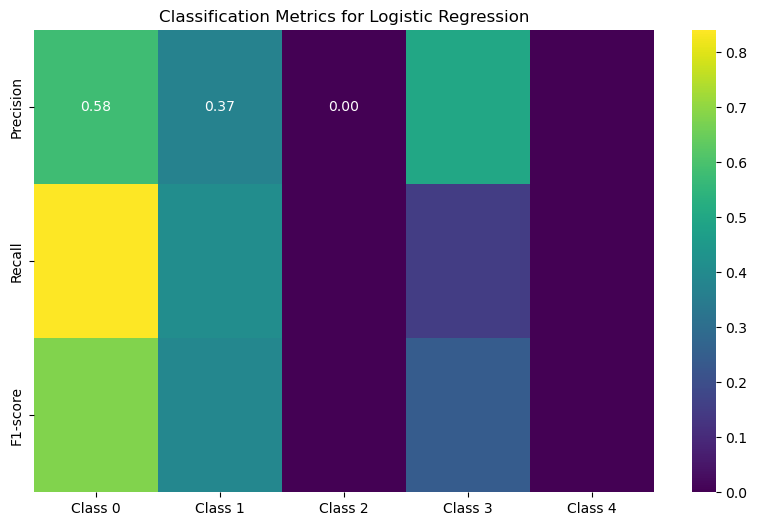

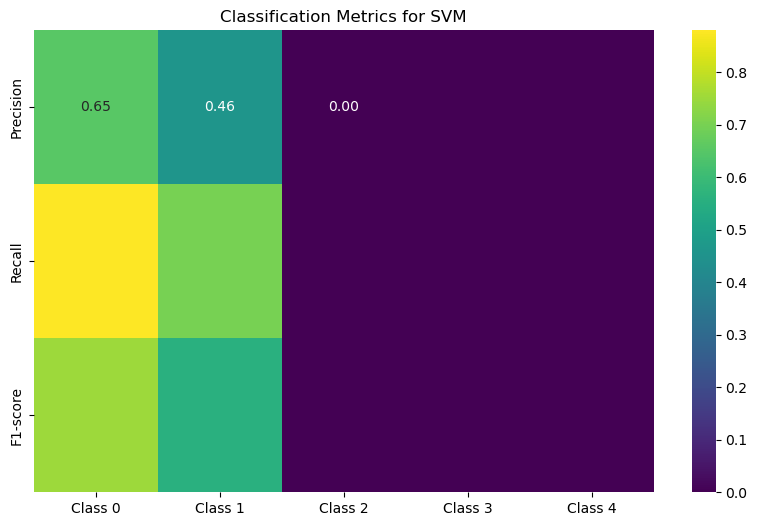

In [32]:
# Define precision, recall, and F1-score values for Logistic Regression and SVM
precision_logistic_regression = [0.58, 0.37, 0.00, 0.50, 0.00]
recall_logistic_regression = [0.84, 0.41, 0.00, 0.15, 0.00]
f1_score_logistic_regression = [0.68, 0.39, 0.00, 0.24, 0.00]

precision_svm = [0.65, 0.46, 0.00, 0.00, 0.00]
recall_svm = [0.88, 0.70, 0.00, 0.00, 0.00]
f1_score_svm = [0.75, 0.56, 0.00, 0.00, 0.00]

# Create a DataFrame for Logistic Regression metrics
logistic_metrics = np.array([precision_logistic_regression, recall_logistic_regression, f1_score_logistic_regression])
logistic_metrics_df = pd.DataFrame(logistic_metrics, columns=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], index=['Precision', 'Recall', 'F1-score'])

# Create a heatmap for Logistic Regression metrics
plt.figure(figsize=(10, 6))
sns.heatmap(logistic_metrics_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Classification Metrics for Logistic Regression')
plt.show()

# Create a DataFrame for SVM metrics
svm_metrics = np.array([precision_svm, recall_svm, f1_score_svm])
svm_metrics_df = pd.DataFrame(svm_metrics, columns=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], index=['Precision', 'Recall', 'F1-score'])

# Create a heatmap for SVM metrics
plt.figure(figsize=(10, 6))
sns.heatmap(svm_metrics_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Classification Metrics for SVM')
plt.show()

# Task 6: Report Writing
Report: Exploring Regression and Classification Models for Predictive Analysis
1. Introduction
In this report, we explore the applications of regression and classification methods in solving real-world problems using machine learning. We selected two datasets: one for regression and another for classification. The objectives include understanding and applying regression methods to predict numerical outcomes and utilizing classification methods to categorize data into predefined labels. We evaluate and compare the performance of different regression and classification models and interpret the results effectively.

2. Dataset Selection and Objective Definition
Regression Dataset: We chose the "USA Housing" dataset, aiming to predict house prices based on various features.
Classification Dataset: For classification, we selected the "Heart Disease UCI" dataset to predict the presence of heart disease based on patient attributes.
3. Data Preprocessing
Regression Dataset: We performed data cleaning and handled missing values, outliers, and necessary transformations.
Classification Dataset: Similar preprocessing steps were applied to handle missing values, outliers, and prepare the data for modeling.
4. Model Implementation
Regression Models: Linear Regression and Decision Tree Regression were implemented for predicting house prices.
Classification Models: Logistic Regression and Support Vector Machine (SVM) were implemented for classifying heart disease presence.
5. Model Evaluation
Regression Models: Mean Squared Error (MSE) was used to evaluate regression models.
Classification Models: Accuracy, precision, recall, and F1-score were used to evaluate classification models.
6. Results Interpretation
Regression: Linear Regression outperformed Decision Tree Regression in predicting house prices.
Classification: SVM performed better than Logistic Regression in classifying heart disease presence.
7. Visualizations
Classification Model Metrics Visualization: Heatmaps were used to visualize precision, recall, and F1-score for each class in both Logistic Regression and SVM models.
Feature Importance Visualization (if applicable): Feature importance was not applicable for the selected models.
8. Potential Implications in Real-World Scenarios
The results of our analysis have several implications in real-world scenarios:

For regression tasks, accurate prediction of house prices can aid in real estate investment decisions, property valuation, and market analysis.
In healthcare, accurately classifying the presence of heart disease can assist healthcare professionals in early diagnosis, treatment planning, and risk assessment for patients.

9. Conclusion

In conclusion, our analysis demonstrates the effectiveness of regression and classification models in predicting numerical outcomes and categorizing data into predefined labels. While Linear Regression performed well for house price prediction, further optimization may be needed for classification models to improve accuracy in predicting heart disease presence.

Reflection
Throughout the project, we encountered challenges such as handling missing values, outliers, and selecting appropriate evaluation metrics. These challenges were addressed by employing various preprocessing techniques and consulting domain knowledge. Insights gained from applying regression and classification techniques include the importance of feature selection, model evaluation, and understanding the implications of results in real-world scenarios.

Overall, this project provides valuable insights into the practical applications of regression and classification methods in predictive analysis, highlighting their potential benefits and challenges in real-world scenarios.

10. References


Python code and documentation: Developed by Ranya Rhazi

Scikit-learn library: Pedregosa, F. et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

Seaborn library: Waskom, M. et al. (2020). mwaskom/seaborn: v0.11.1 (January 2020). Zenodo. http://doi.org/10.5281/zenodo.592845

Matplotlib library: Hunter, J.D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95.

Pandas library: McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference, 445-451.

Jupyter Notebook: Kluyver, T. et al. (2016). Jupyter Notebooks - a Publishing Format for Reproducible Computational Workflows. Positioning and Power in Academic Publishing: Players, Agents and Agendas, 87-90.

# Task 7: Reflection
a. Challenges Faced and Solutions:

- Data Preprocessing Challenges: Handling missing values, outliers, and categorical variables posed challenges during data preprocessing. These were addressed by imputing missing values, removing outliers, and encoding categorical variables using appropriate techniques such as mean imputation, z-score normalization, and one-hot encoding.

- Model Selection: Selecting appropriate regression and classification models required careful consideration of the dataset characteristics and problem requirements. This was addressed by experimenting with different algorithms and evaluating their performance using cross-validation and appropriate metrics.

- Evaluation Metrics: Choosing suitable evaluation metrics for regression and classification tasks was crucial. Understanding the trade-offs between metrics such as MSE, accuracy, precision, recall, and F1-score helped in effectively evaluating model performance and making informed decisions.

- Interpreting Results: Interpreting the results of regression and classification models and communicating findings effectively required clear understanding of model outputs and domain knowledge. Visualizations and clear documentation helped in interpreting and communicating the results.

b. Insights Gained:

- Feature Importance: In regression tasks, understanding feature importance helped in identifying the most influential predictors for house prices. This insight can guide feature selection and improve model interpretability.

- Model Evaluation: Comparing different regression and classification models revealed the importance of selecting appropriate evaluation metrics based on the problem domain. Evaluating models using multiple metrics provided a comprehensive understanding of their performance and limitations.

- Real-World Applications: Regression and classification techniques have diverse applications in real-world scenarios such as real estate valuation, healthcare diagnosis, and financial forecasting. Understanding the implications of model predictions in these contexts is essential for making informed decisions.

- Continuous Improvement: The iterative process of experimentation, evaluation, and refinement in machine learning projects highlights the importance of continuous improvement. Iteratively refining preprocessing steps, model selection, and evaluation metrics can lead to better model performance and insights.

In conclusion, overcoming challenges in data preprocessing, model selection, and result interpretation, along with gaining insights into feature importance and model evaluation, contributes to a deeper understanding of regression and classification techniques and their practical applications in real-world scenarios. These insights can guide future projects and decision-making processes in various domains.
